In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

sns.set_theme()

In [2]:
# Read the data files
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    lines = [line.strip().replace('None', 'Draw') for line in lines]
    return lines

In [3]:
c_configs = ['budget-10', 'budget-20','budget-50', 'budget-100', 'budget-200', 'budget-500']

results = {}

for c_config in c_configs:
    results[c_config] = {}
    results[c_config]['results'] = np.array(read_data(f"../../results/mcts_results_{c_config}.txt"))
    results[c_config]['wins'] = np.count_nonzero(results[c_config]['results'] == 'MCTS') / len(results[c_config]['results'])
    results[c_config]['losses'] = np.count_nonzero(results[c_config]['results'] == 'RANDOM') / len(results[c_config]['results'])
    results[c_config]['draws'] = np.count_nonzero(results[c_config]['results'] == 'Draw') / len(results[c_config]['results'])
    results[c_config]['crashes'] = np.count_nonzero(results[c_config]['results'] == 'Crash') / len(results[c_config]['results'])


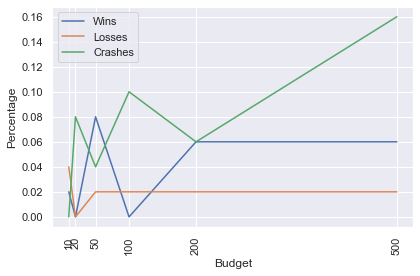

In [4]:
c_x = [10, 20, 50, 100, 200, 500]

wins = [results[c_config]['wins'] for c_config in c_configs]
losses = [results[c_config]['losses'] for c_config in c_configs]
draws = [results[c_config]['draws'] for c_config in c_configs]
crashes = [results[c_config]['crashes'] for c_config in c_configs]


sns.lineplot(x=c_x, y=wins, label='Wins')
sns.lineplot(x=c_x, y=losses, label='Losses')
# sns.lineplot(x=c_x, y=draws, label='Draws')
sns.lineplot(x=c_x, y=crashes, label='Crashes')
plt.xlabel('Budget')
plt.ylabel('Percentage')
plt.legend()


# rotate the labels 90 degrees using the rotation argument
plt.xticks(c_x, rotation=90)
# make sure x labels dont overlap
plt.tight_layout()

plt.savefig('mcts_vs_random_budget.pdf')

Best configuration: budget-50


C:\Users\Savaa\.virtualenvs\botbowl-1ektu8S-\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


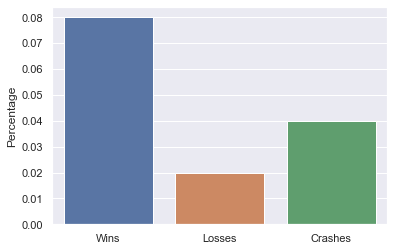

In [6]:
# Analyse best configuration
# best_config = c_configs[np.argmax([results[c_config]['wins'] for c_config in c_configs])]
best_config = 'budget-50'
print(f"Best configuration: {best_config}")

labels = ['Wins', 'Losses', 'Crashes']
sns.barplot(labels, [results[best_config]['wins'], results[best_config]['losses'], results[best_config]['crashes']])
plt.ylabel('Percentage')
plt.savefig(f"mcts_results_budget_{best_config}.pdf")